# Titanic Classification
Task 1 for CodeAlpha 


In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder , StandardScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import joblib

In [2]:
data=pd.read_csv("C:/Users/rahmaidris/Desktop/Titanic_Classification/titanic_data.csv")

# Exploring the Data:


In [3]:
data.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

Columns or Features Description

Survived: Indicates whether a passenger survived (1) or died (0).

Pclass: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).


Sex: Represents the gender of the passenger, typically categorized as male or female.

Age: The age of the passenger, often represented as a numerical value.

SibSp: Indicates the number of siblings or spouses traveling with the passenger.

Parch: Represents the number of parents or children traveling with the passenger.

Fare: The amount of money spent on the ticket.

Embarked: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          713 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     887 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  887 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.2+ KB


In [5]:
# Get a describtion about data
data.describe(include='all')

survived      pclass   sex         age       sibsp       parch  \
count   889.000000  889.000000   889  713.000000  889.000000  889.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   575         NaN         NaN         NaN   
mean      0.384702    2.307087   NaN   29.698696    0.523060    0.382452   
std       0.486799    0.836367   NaN   14.536691    1.103729    0.806761   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.000000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   889.000000      887    889  889        889  203          887   889   
unique         NaN        3      3    3          2    7            3     2   
top            NaN        S  Third  man       True    C  Southampton    no   
freq           NaN      643    489  535        535   59          643   547   
mean     32.259059      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
std      49.735870      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
min       0.000000      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
25%       7.925000      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
50%      14.454200      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
75%      31.000000      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
max     512.329200      NaN    NaN  NaN        NaN  NaN          NaN   NaN   

       alone  
count    889  
unique     2  
top     True  
freq     536  
mean     NaN  
std      NaN  
min      NaN  
25%      NaN  
50%      NaN  
75%      NaN  
max      NaN

In [6]:
data.isna().sum()


survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
data.duplicated().sum()


107

In [8]:
data = data.drop_duplicates()


In [9]:
data.duplicated().sum()


0

# Data Visalisation:

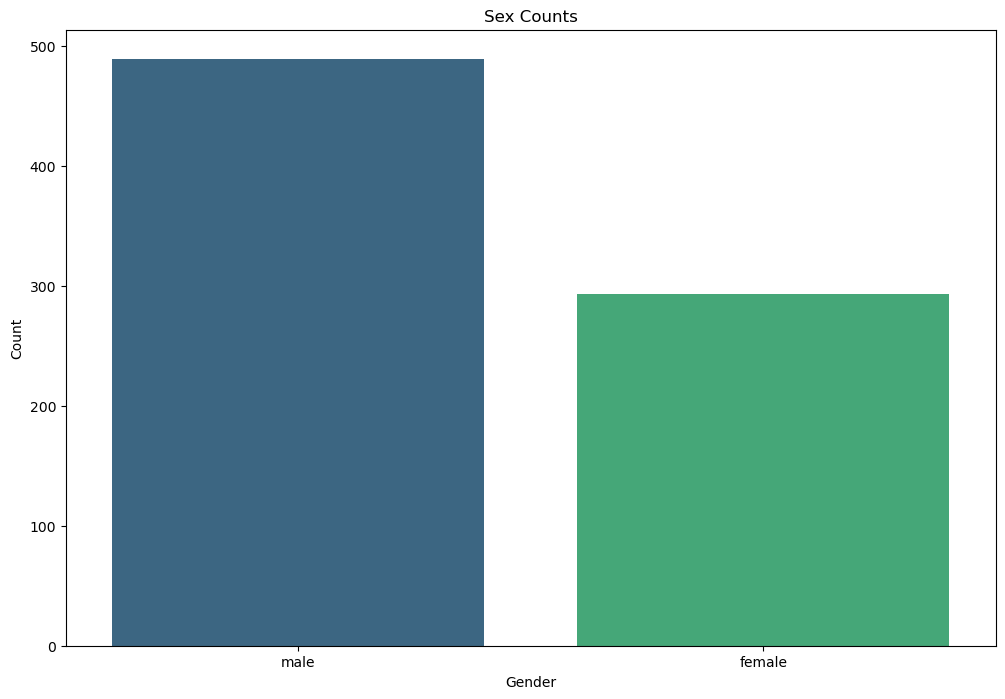

In [10]:
sex = data['sex'].value_counts()

# Now, plot the barplot
plt.figure(figsize=(12,8))
sns.barplot(x=sex.index, y=sex.values, palette='viridis')
plt.title('Sex Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

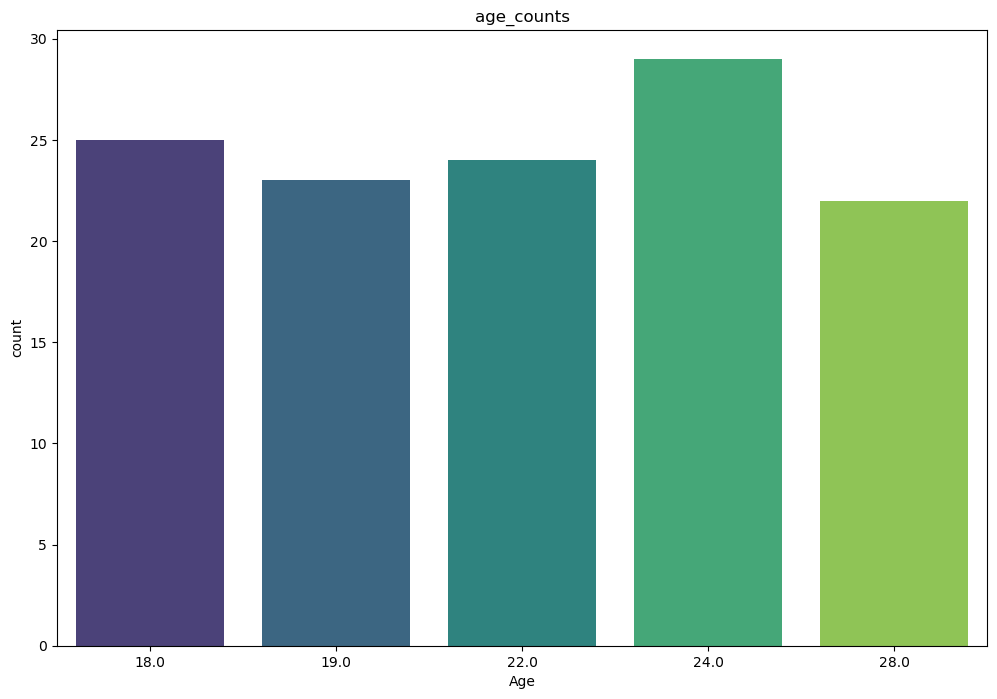

age
24.0    29
18.0    25
22.0    24
19.0    23
28.0    22
Name: count, dtype: int64

In [11]:
#the most 5 age in data
age_counts=data['age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

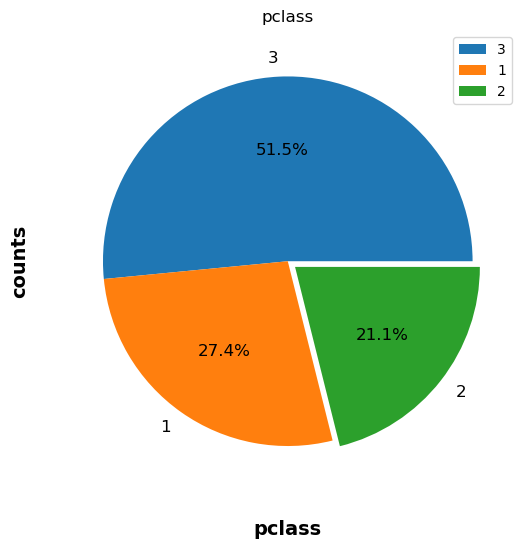

In [12]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
pclass_counts=data['pclass'].value_counts().head()

pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()

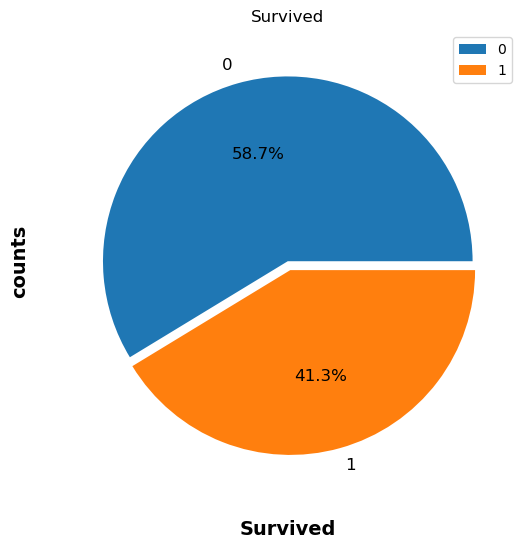

In [13]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts=data['survived'].value_counts().head()

Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

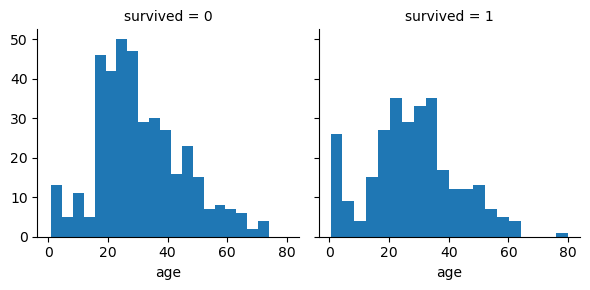

In [14]:
age=sns.FacetGrid(data,col='survived')
age.map(plt.hist,'age',bins=20)

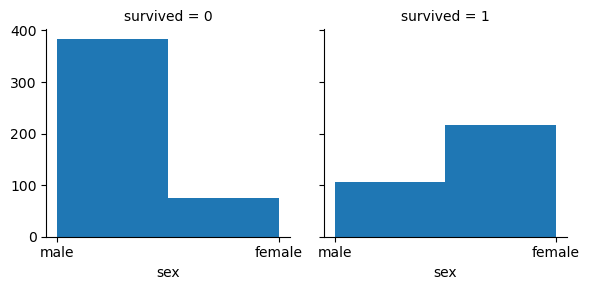

In [15]:
gender=sns.FacetGrid(data,col='survived')

gender.map(plt.hist,'sex',bins=2)


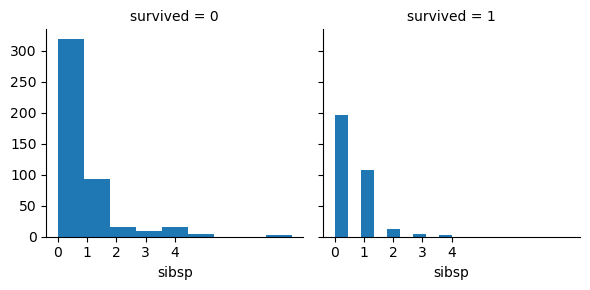

In [16]:
sibsp=sns.FacetGrid(data,col='survived')
sibsp_counts=data['sibsp'].value_counts().head()

plt.xticks(sibsp_counts.index)
sibsp.map(plt.hist,'sibsp',bins=9)

# Data Preprocessing

In [17]:
from scipy import stats
#handle null value

def handle_null_values(df, threshold=0.3):
    """
    Identify and handle null values in the DataFrame.
    
    :param df: Input DataFrame
    :param threshold: Maximum ratio of nulls to total values for imputation (default 0.3)
    :return: DataFrame with null values handled
    """
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()
    
    # Identify columns with null values
    null_columns = df.columns[df.isnull().any()].tolist()
    
    for column in null_columns:
        null_ratio = df[column].isnull().sum() / len(df)
        
        # If null ratio is above threshold, drop the column
        if null_ratio > threshold:
            print(f"Dropping column '{column}' (null ratio: {null_ratio:.2f})")
            df_cleaned = df_cleaned.drop(column, axis=1)
        else:
            # Determine the data type of the column
            dtype = df[column].dtype
            
            if pd.api.types.is_numeric_dtype(dtype):
                # For numeric data
                if df[column].nunique() / len(df[column].dropna()) < 0.05:
                    # If few unique values, use mode
                    fill_value = df[column].mode()[0]
                    method = "mode"
                elif stats.skew(df[column].dropna()) > 1:
                    # If highly skewed, use median
                    fill_value = df[column].median()
                    method = "median"
                else:
                    # Otherwise, use mean
                    fill_value = df[column].mean()
                    method = "mean"
                
                df_cleaned[column] = df_cleaned[column].fillna(fill_value)
                
            elif pd.api.types.is_string_dtype(dtype):
                # For string data, use mode
                fill_value = df[column].mode()[0]
                method = "mode"
                df_cleaned[column] = df_cleaned[column].fillna(fill_value)
                
            elif pd.api.types.is_datetime64_any_dtype(dtype):
                # For datetime data, use the most frequent day of week and mean time
                day_of_week_mode = df[column].dt.dayofweek.mode()[0]
                mean_time = df[column].dt.time.mean()
                
                def fill_datetime(x):
                    if pd.isnull(x):
                        return pd.Timestamp.combine(
                            pd.Timestamp.now().normalize() + pd.Timedelta(days=day_of_week_mode), 
                            mean_time
                        )
                    return x
                
                df_cleaned[column] = df_cleaned[column].apply(fill_datetime)
                method = "custom datetime"
            
            else:
                # For other types, use mode
                fill_value = df[column].mode()[0]
                method = "mode"
                df_cleaned[column] = df_cleaned[column].fillna(fill_value)
            
            print(f"Filled nulls in '{column}' using {method}")
    
    return df_cleaned

cleaned_data = handle_null_values(data)

Filled nulls in 'age' using mean
Filled nulls in 'embarked' using mode
Dropping column 'deck' (null ratio: 0.74)
Filled nulls in 'embark_town' using mode


In [18]:
cleaned_data.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [19]:
data.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [20]:
data['sex']=data['sex'].replace({'male':1,'female':0})
data.head()

survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3    1  22.0      1      0   7.2500        S  Third    man   
1         1       1    0  38.0      1      0  71.2833        C  First  woman   
2         1       3    0  26.0      0      0   7.9250        S  Third  woman   
3         1       1    0  35.0      1      0  53.1000        S  First  woman   
4         0       3    1  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True

In [21]:
data['embarked']=data['embarked'].replace({'S':1,'C':2,'Q':3})
data.head()

survived  pclass  sex   age  sibsp  parch     fare  embarked  class    who  \
0         0       3    1  22.0      1      0   7.2500       1.0  Third    man   
1         1       1    0  38.0      1      0  71.2833       2.0  First  woman   
2         1       3    0  26.0      0      0   7.9250       1.0  Third  woman   
3         1       1    0  35.0      1      0  53.1000       1.0  First  woman   
4         0       3    1  35.0      0      0   8.0500       1.0  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True

In [22]:
data['class']=data['class'].replace({'First':1,'Second':2,'Third':0})
data.head()

survived  pclass  sex   age  sibsp  parch     fare  embarked  class    who  \
0         0       3    1  22.0      1      0   7.2500       1.0      0    man   
1         1       1    0  38.0      1      0  71.2833       2.0      1  woman   
2         1       3    0  26.0      0      0   7.9250       1.0      0  woman   
3         1       1    0  35.0      1      0  53.1000       1.0      1  woman   
4         0       3    1  35.0      0      0   8.0500       1.0      0    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True

In [23]:
data=data.drop(columns=['alive','who','adult_male','deck','embark_town','adult_male','class'], axis=1)
data.head()

survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
0         0       3    1  22.0      1      0   7.2500       1.0  False
1         1       1    0  38.0      1      0  71.2833       2.0  False
2         1       3    0  26.0      0      0   7.9250       1.0   True
3         1       1    0  35.0      1      0  53.1000       1.0  False
4         0       3    1  35.0      0      0   8.0500       1.0   True

In [24]:
data.corr()


survived    pclass       sex       age     sibsp     parch  \
survived  1.000000 -0.331392 -0.514972 -0.086583 -0.036684  0.069327   
pclass   -0.331392  1.000000  0.113788 -0.369605  0.088184  0.041476   
sex      -0.514972  0.113788  1.000000  0.101594 -0.098429 -0.236212   
age      -0.086583 -0.369605  0.101594  1.000000 -0.315183 -0.195068   
sibsp    -0.036684  0.088184 -0.098429 -0.315183  1.000000  0.381649   
parch     0.069327  0.041476 -0.236212 -0.195068  0.381649  1.000000   
fare      0.245969 -0.548785 -0.168636  0.092732  0.135208  0.191412   
embarked  0.078543  0.018728 -0.094732  0.013131 -0.046832 -0.070571   
alone    -0.177287  0.110116  0.281322  0.210164 -0.609212 -0.572203   

              fare  embarked     alone  
survived  0.245969  0.078543 -0.177287  
pclass   -0.548785  0.018728  0.110116  
sex      -0.168636 -0.094732  0.281322  
age       0.092732  0.013131  0.210164  
sibsp     0.135208 -0.046832 -0.609212  
parch     0.191412 -0.070571 -0.572203  
fare      1.000000  0.087553 -0.247218  
embarked  0.087553  1.000000  0.017258  
alone    -0.247218  0.017258  1.000000

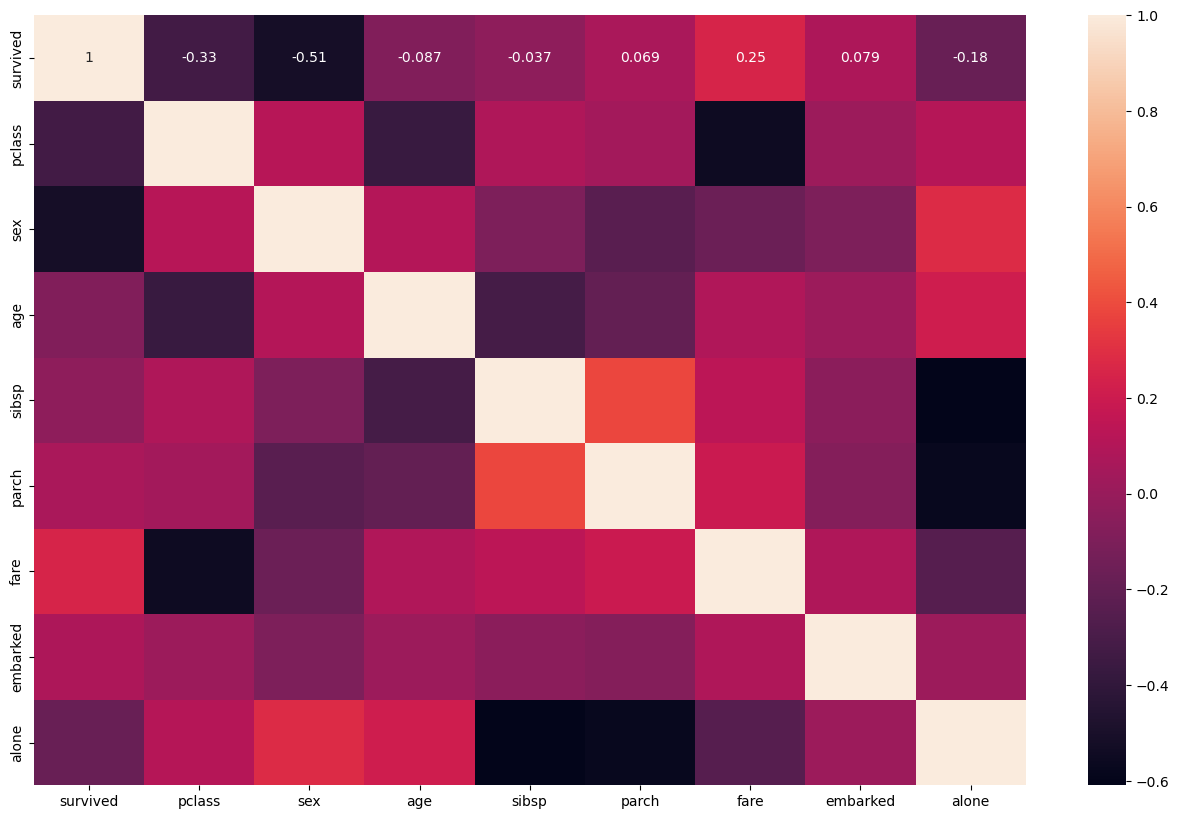

In [25]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [26]:
data=data.drop(columns=['alone'], axis=1)
data.head()

survived  pclass  sex   age  sibsp  parch     fare  embarked
0         0       3    1  22.0      1      0   7.2500       1.0
1         1       1    0  38.0      1      0  71.2833       2.0
2         1       3    0  26.0      0      0   7.9250       1.0
3         1       1    0  35.0      1      0  53.1000       1.0
4         0       3    1  35.0      0      0   8.0500       1.0

In [27]:
x=data.drop(columns=['survived'])
y=data['survived']

In [28]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)


In [30]:
y=y.values.reshape(-1,1)


In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

# Models

# Logistic Regression

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can use "median" or "most_frequent" instead
X_train_imputed = imputer.fit_transform(X_train)



In [33]:
from sklearn.impute import SimpleImputer

# Impute missing values in the training data
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)

# Impute missing values in the test data
X_test_imputed = imputer.transform(X_test)

# Train the model
lg = LogisticRegression(penalty="l2", max_iter=1000, solver="lbfgs")
lg.fit(X_train_imputed, y_train)



LogisticRegression(max_iter=1000)

In [34]:
# Evaluate the model
score = lg.score(X_train_imputed, y_train)
y_pred = lg.predict(X_test_imputed)

In [35]:
print(accuracy_score(y_test,y_pred))


0.7070063694267515


[[62 21]
 [25 49]]


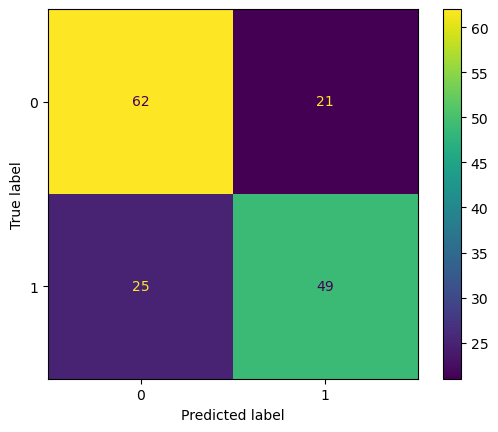

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))


In [37]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.75      0.73        83
           1       0.70      0.66      0.68        74

    accuracy                           0.71       157
   macro avg       0.71      0.70      0.70       157
weighted avg       0.71      0.71      0.71       157



# Decision tree

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')


X_train = imputer.fit_transform(X_train)

X_test = imputer.transform(X_test)

from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [39]:
Dt.score(X_train,y_train)



0.984

In [40]:
y_pred=Dt.predict(X_test)


In [41]:
print(accuracy_score(y_test,y_pred))


0.732484076433121


[[63 20]
 [22 52]]


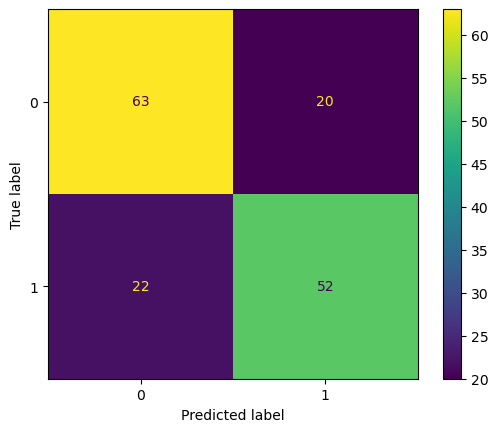

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [43]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.76      0.75        83
           1       0.72      0.70      0.71        74

    accuracy                           0.73       157
   macro avg       0.73      0.73      0.73       157
weighted avg       0.73      0.73      0.73       157



RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

Rf = RandomForestClassifier(n_estimators=1000)
Rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [45]:
Rf.score(X_train,y_train)


0.984

In [46]:
y_pred=Rf.predict(X_test)


In [47]:
print(accuracy_score(y_test,y_pred))


0.732484076433121


[[66 17]
 [25 49]]


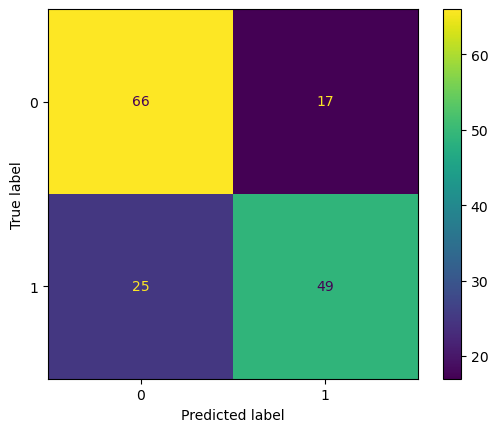

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [49]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.80      0.76        83
           1       0.74      0.66      0.70        74

    accuracy                           0.73       157
   macro avg       0.73      0.73      0.73       157
weighted avg       0.73      0.73      0.73       157



# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
knn.score(X_train,y_train)


0.8512

[[66 17]
 [25 49]]


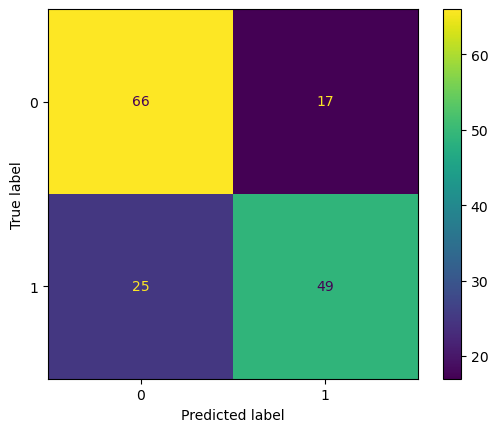

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [53]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.80      0.76        83
           1       0.74      0.66      0.70        74

    accuracy                           0.73       157
   macro avg       0.73      0.73      0.73       157
weighted avg       0.73      0.73      0.73       157



The logistic regression is the model I will work with, since it gave the best accuracy in here

In [54]:
import joblib

# Assuming rf is your trained model
joblib.dump(lg, 'model.pkl')


['model.pkl']